<a href="https://colab.research.google.com/github/shreyanknp/DA1/blob/main/Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import matplotlib.pyplot as plt

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
#print(df.head(10))
df['target'] = data.target
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [20]:
#introducing misssing values into the dataset
np.random.seed(42)
df.loc[np.random.choice(df.index, 10), 'bmi'] = np.nan
print("\n",df.isnull().sum())

#df['bmi'].fillna(df['bmi'].mean(), inplace=True)
imputer = SimpleImputer(strategy='mean')
df['bmi'] = imputer.fit_transform(df[['bmi']])
print("\n",df.isnull().sum())


 age       0
sex       0
bmi       9
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [21]:
#standardization and normalisation
s_std = StandardScaler()
s_minmax = MinMaxScaler()

df_std = pd.DataFrame(s_std.fit_transform(df.iloc[:, :-1]), columns=data.feature_names)
df_minmax = pd.DataFrame(s_minmax.fit_transform(df.iloc[:, :-1]), columns=data.feature_names)
print(df_std)
print(df_minmax)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.800500  1.065488  1.302317  0.459841 -0.929746 -0.732065 -0.912451   
1   -0.039567 -0.938537 -1.092806 -0.553505 -0.177624 -0.402886  1.564414   
2    1.793307  1.065488  0.937346 -0.119214 -0.958674 -0.718897 -0.680245   
3   -1.872441 -0.938537 -0.248810 -0.770650  0.256292  0.525397 -0.757647   
4    0.113172 -0.938537 -0.773456  0.459841  0.082726  0.327890  0.171178   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.876870  1.065488  0.412700  1.256040 -0.119769 -0.053957 -0.602843   
438 -0.115937  1.065488 -0.340053 -1.422086  1.037341  1.664355 -0.602843   
439  0.876870  1.065488 -0.340053  0.363573 -0.785107 -0.290965 -0.525441   
440 -0.956004 -0.938537  0.823292  0.025550  0.343075  0.321306 -0.602843   
441 -0.956004 -0.938537 -1.549020 -1.711613  1.760535  0.584649  3.654268   

           s4        s5        s6  
0   -0.054499  0.418531 -0.370989  
1  

<ipython-input-22-0d4dd3415716>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['bmi_smoothed'] = df['bmi_noisy'].rolling(window=5, center=True).mean().fillna(method='bfill').fillna(method='ffill')


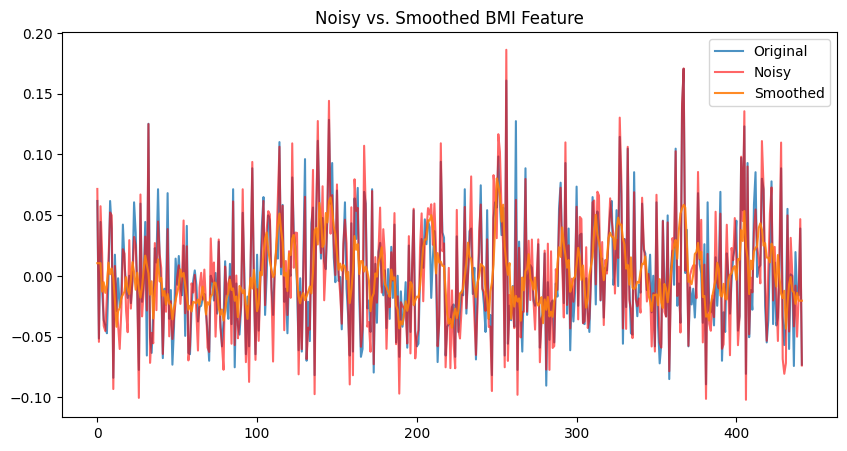

In [22]:
#handling noise
np.random.seed(42)
df['bmi_noisy'] = df['bmi'] + np.random.normal(0, 0.02, size=df.shape[0])
df['bmi_smoothed'] = df['bmi_noisy'].rolling(window=5, center=True).mean().fillna(method='bfill').fillna(method='ffill')

plt.figure(figsize=(10, 5))
plt.plot(df['bmi'], label='Original', alpha=0.8)
plt.plot(df['bmi_noisy'], label='Noisy',color='red', alpha=0.6)
plt.plot(df['bmi_smoothed'], label='Smoothed', alpha=0.9)
plt.legend()
plt.title("Noisy vs. Smoothed BMI Feature")
plt.show()

In [23]:
#handling outliers
z_s=zscore(df['bmi'])
outliers=np.where(np.abs(z_s)>3)[0]
print(f"Outliers detected at indices: {outliers}")

# removing outliers
df = df.drop(index=outliers)

Outliers detected at indices: [256 367]


In [24]:
#feature selection
X=df.iloc[:, :-1]
y=df['target']

#Correlation and Mutual Information
correlation=X.corrwith(y)
print("Correlation with target:")
print(correlation)

mi=mutual_info_regression(X, y)
print("\nMutual Information with target:")
print(mi)

#Recursive Feature Elimination
model=LinearRegression()
rfe=RFE(model, n_features_to_select=5)
rfe.fit(X, y)
print("\nFeatures selected by RFE:")
print(X.columns[rfe.support_])

#Lasso Regression
lasso=LassoCV(cv=5, random_state=42, max_iter=10000)
lasso.fit(X, y)
print("\nFeatures selected by Lasso:")
print(X.columns[lasso.coef_ != 0])

Correlation with target:
age          0.196268
sex          0.046101
bmi          0.570922
bp           0.450793
s1           0.215920
s2           0.176226
s3          -0.391905
s4           0.428681
s5           0.566148
s6           0.382911
target       1.000000
bmi_noisy    0.534484
dtype: float64

Mutual Information with target:
[0.00000000e+00 3.17720461e-02 1.76886819e-01 5.37771314e-02
 6.32632890e-02 1.97867407e-03 6.11343078e-02 9.28502148e-02
 1.49933824e-01 1.00016768e-01 4.59154407e+00 1.29811570e-01]

Features selected by RFE:
Index(['age', 's1', 's2', 's3', 'target'], dtype='object')

Features selected by Lasso:
Index(['target'], dtype='object')
